Importing libraries

In [1]:
import twint
import pandas as pd
import re
import matplotlib.pyplot as plt
from ekphrasis.classes.segmenter import Segmenter
import preprocessor as p

import nltk
from nltk import word_tokenize, FreqDist
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
# nltk.download
# nltk.download('wordnet')
# nltk.download('stopwords')
# nltk.download('omw-1.4')
from nltk.tokenize import TweetTokenizer
from wordcloud import WordCloud


Data collection

In [ ]:
Canada_cities=['Banff', 'Brooks', 'Calgary', 'Edmonton', 'Fort McMurray', 'Grande Prairie', 'Jasper', 'Lake Louise', 'Lethbridge', 'Medicine Hat', 'Red Deer', 'Saint Albert', 'Barkerville', 'Burnaby', 'Campbell River', 'Chilliwack', 'Courtenay', 'Cranbrook', 'Dawson Creek', 'Delta', 'Esquimalt', 'Fort Saint James', 'Fort Saint John', 'Hope', 'Kamloops', 'Kelowna', 'Kimberley', 'Kitimat', 'Langley', 'Nanaimo', 'Nelson', 'New Westminster', 'North Vancouver', 'Oak Bay', 'Penticton', 'Powell River', 'Prince George', 'Prince Rupert', 'Quesnel', 'Revelstoke', 'Rossland', 'Trail', 'Vancouver', 'Vernon', 'Victoria', 'West Vancouver', 'White Rock', 'Brandon', 'Churchill', 'Dauphin', 'Flin Flon', 'Kildonan', 'Saint Boniface', 'Swan River', 'Thompson', 'Winnipeg', 'York Factory', 'Bathurst', 'Caraquet', 'Dalhousie', 'Fredericton', 'Miramichi', 'Moncton', 'Saint John', 'Argentia', 'Bonavista', 'Channel-Port aux Basques', 'Corner Brook', 'Ferryland', 'Gander', 'Grand Falls–Windsor', 'Happy Valley–Goose Bay', 'Harbour Grace', 'Labrador City', 'Placentia', 'Saint Anthony', 'St. John’s', 'Wabana', 'Fort Smith', 'Hay River', 'Inuvik', 'Tuktoyaktuk', 'Yellowknife', 'Baddeck', 'Digby', 'Glace Bay', 'Halifax', 'Liverpool', 'Louisbourg', 'Lunenburg', 'Pictou', 'Port Hawkesbury', 'Springhill', 'Sydney', 'Yarmouth', 'Iqaluit', 'Bancroft', 'Barrie', 'Belleville', 'Brampton', 'Brantford', 'Brockville', 'Burlington', 'Cambridge', 'Chatham', 'Chatham-Kent', 'Cornwall', 'Elliot Lake', 'Etobicoke', 'Fort Erie', 'Fort Frances', 'Gananoque', 'Guelph', 'Hamilton', 'Iroquois Falls', 'Kapuskasing', 'Kawartha Lakes', 'Kenora', 'Kingston', 'Kirkland Lake', 'Kitchener', 'Laurentian Hills', 'London', 'Midland', 'Mississauga', 'Moose Factory', 'Moosonee', 'Niagara Falls', 'Niagara-on-the-Lake', 'North Bay', 'North York', 'Oakville', 'Orillia', 'Oshawa', 'Ottawa', 'Parry Sound', 'Perth', 'Peterborough', 'Picton', 'Port Colborne', 'Saint Catharines', 'Saint Thomas', 'Sarnia-Clearwater', 'Sault Sainte Marie', 'Scarborough', 'Simcoe', 'Stratford', 'Sudbury', 'Temiskaming Shores', 'Thorold', 'Thunder Bay', 'Timmins', 'Toronto', 'Trenton', 'Waterloo', 'Welland', 'West Nipissing', 'Windsor', 'Woodstock', 'York', 'Borden', 'Cavendish', 'Charlottetown', 'Souris', 'Summerside', 'Asbestos', 'Baie-Comeau', 'Beloeil', 'Cap-de-la-Madeleine', 'Chambly', 'Charlesbourg', 'Châteauguay', 'Chibougamau', 'Côte-Saint-Luc', 'Dorval', 'Gaspé', 'Gatineau', 'Granby', 'Havre-Saint-Pierre', 'Hull', 'Jonquière', 'Kuujjuaq', 'La Salle', 'La Tuque', 'Lachine', 'Laval', 'Lévis', 'Longueuil', 'Magog', 'Matane', 'Montreal', 'Montréal-Nord', 'Percé', 'Port-Cartier', 'Quebec', 'Rimouski', 'Rouyn-Noranda', 'Saguenay', 'Saint-Eustache', 'Saint-Hubert', 'Sainte-Anne-de-Beaupré', 'Sainte-Foy', 'Sainte-Thérèse', 'Sept-Îles', 'Sherbrooke', 'Sorel-Tracy', 'Trois-Rivières', 'Val-d’Or', 'Waskaganish', 'Batoche', 'Cumberland House', 'Estevan', 'Flin Flon', 'Moose Jaw', 'Prince Albert', 'Regina', 'Saskatoon', 'Uranium City', 'Dawson', 'Watson Lake', 'Whitehorse']
dates=["2020-01-01 00:00:00","2021-01-01 00:00:00","2022-01-01 00:00:00"]
# Configure
for j in range(2):
    for i in Canada_cities:
        c = twint.Config()
        c.Search = "(wear OR wearing OR covid) AND (mask OR masks)"
        c.Near=i
        c.Lang="en"
        c.Filter_retweets=True
        c.Since=dates[j]
        c.Until=dates[j+1]
        c.Output="Canada.csv"
        c.Store_csv=True
        c.Count=True
        c.Limit=500
        twint.run.Search(c)

visualisation of the evolution of the number of tweets by months

In [2]:

#convert the csv file to a dataframe which will be sorted by date column
canada="Canada.csv"
canada_df=pd.read_csv(canada , usecols=["date","tweet"])
canada_df['date'] = pd.to_datetime(canada_df['date'])
canada_df.sort_values(by= 'date' , inplace=True)
canada_df=canada_df.reset_index(drop=True)
canada_df.to_csv("sorted.csv")




In [3]:
time=[f"202{j}-0{i}" for j in range(2) for i in range(1,10)]+[f"202{j}-{i}" for j in range(2) for i in range(10,13)]
time.append("2022-01")
time.sort()
number_tweets=[0]*25

# #count the number of tweets for each month
i,j=0,0
while (j<=24) and (i<=3913):
    if (re.search(f"{time[j]}-\d\d" , str(canada_df.date[i]))):
        number_tweets[j]+=1
        i+=1    
    else:
        j+=1
print(number_tweets)
print(sum(number_tweets))

[0, 4, 4, 13, 15, 28, 74, 61, 106, 168, 344, 862, 292, 21, 11, 17, 13, 14, 52, 91, 138, 130, 131, 877, 448]
3914


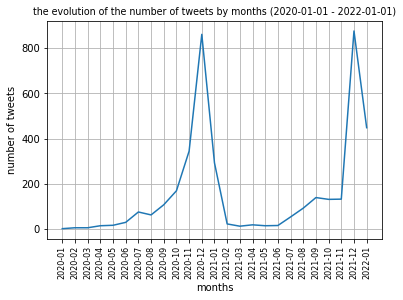

In [4]:
# the evolution of the number of tweets by months (2020-01-01 - 2022-01-01)
plt.plot(time,number_tweets)
plt.xlabel("months")
plt.ylabel("number of tweets")
plt.title("the evolution of the number of tweets by months (2020-01-01 - 2022-01-01)" , fontsize=9.5)
plt.grid(True)
plt.xticks(rotation=90)
plt.xticks(size=8)
plt.savefig('image.png')
plt.show()


Data Preprocessing 

In [7]:
# 1- remove Hashtags symbol
supp_hash_df=canada_df[['tweet']].copy()
print(supp_hash_df.tweet[12])
supp_hash_df['tweet']=supp_hash_df["tweet"].apply(lambda x: re.sub(r"#", "", x))

# seg_tw = Segmenter(corpus="twitter")
# supp_hash_df['tweet']=supp_hash_df["tweet"].apply(lambda x: seg_tw.segment(x))

# 2- Text-Cleaning (URLs, Mentions, etc.)
for v,i in enumerate(supp_hash_df['tweet']):
    supp_hash_df.loc[v,'tweet'] = p.clean(i)

# 3. Tokenization , Removal of Digits, Stop Words and Punctuations
     #  Remove Digits and lower the text 
supp_hash_df['tweet']=supp_hash_df["tweet"].apply(lambda x: x.lower())
# supp_hash_df['tweet']=supp_hash_df["tweet"].apply(lambda x: re.sub(r"\d", "", x))
supp_hash_df['tweet']=supp_hash_df["tweet"].apply(lambda x: re.sub(r"(?!19)\d\d+|\D\d\D", "", x))

     #  Remove Punctuations
supp_hash_df['tweet']=supp_hash_df["tweet"].apply(lambda x: re.sub(r"\.+|\(+|\)+|\%+|\{+|\}+|\[+|\]+|\,+|\;+|\:+|\'+|\"+|\$+|\#+|\@+|\!+|\?+|\/+|\*+|\&+|\^+|\-+|\++", "", x))
     #  Lemmatization + Tokenization — Used a built in TweetTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()
w_tokenizer = TweetTokenizer()
supp_hash_df['tweet']=supp_hash_df["tweet"].apply(lambda x: [(lemmatizer.lemmatize(w)) for w in w_tokenizer.tokenize((x))])
     #  Remove stop words
stop_words = set(stopwords.words('english'))
supp_hash_df['tweet']=supp_hash_df["tweet"].apply(lambda x: [i for i in x if i not in stop_words])

print(supp_hash_df.tweet[12])
supp_hash_df.to_csv("preprocessig.csv")


DIY COVID-19 Mask 😷 #COVID19 #coronavirus #StayHome  https://t.co/aJWWk8hTEf
['diy', 'covid', '19', 'mask', 'covid', '19', 'coronavirus', 'stayhome']


Word Cloud

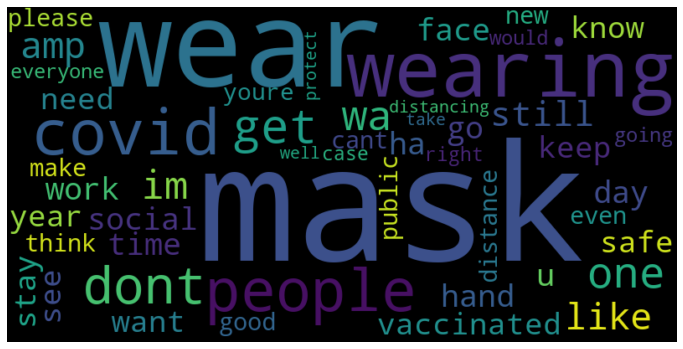

In [6]:
#Frequency of words
a=list(supp_hash_df['tweet'])
b=[a[i][j] for i in range(len(a)) for j in range(len(a[i]))]
fdist = FreqDist(b)

#WordCloud
wc = WordCloud(width=800, height=400, max_words=50).generate_from_frequencies(fdist)
plt.figure(figsize=(12,10))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()